In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# **กำหนดวัตถุประสงค์และเก็บข้อมูล**
#### **PD (Probability of Default):** ใช้ข้อมูลลูกค้าและพฤติกรรมทางการเงินเพื่อทำนายว่าใครมีแนวโน้มที่จะผิดนัดชำระ
#### **LGD (Loss Given Default):** ใช้ข้อมูลเกี่ยวกับหนี้สิน, หลักประกัน, และอัตราการเรียกเก็บหนี้เมื่อผิดนัด

In [184]:
credit_risk= pd.read_csv("UCI_credit_card.csv")
credit_risk = credit_risk.drop(columns=['ID'])

credit_risk['SEX'] = credit_risk['SEX'].replace({1: 'Male', 2: 'Female'})
credit_risk['EDUCATION'] = credit_risk['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others',5:'Others',6:'Others'})
credit_risk['MARRIAGE'] = credit_risk['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'})
credit_risk

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [185]:
credit_risk.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **การเตรียมข้อมูล (Data Preprocessing)**

In [186]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [187]:
credit_risk[['SEX','EDUCATION','MARRIAGE']] = credit_risk[['SEX','EDUCATION','MARRIAGE']].astype('str')

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

credit_risk.isnull().sum() # Check Null Values = No missing values

# # 1.Transform Categorical Text to numerical values [One Hot Encoding]
# encoder = OneHotEncoder(sparse_output=False)
# encoded_data = encoder.fit_transform(credit_risk[['SEX', 'EDUCATION', 'MARRIAGE']])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE']))

# # 1.1Drop original categorical columns and concatenate encoded columns
# result = pd.concat([credit_risk.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE']), encoded_df], axis=1)
# result


# 2. Label Encoding
encoder = LabelEncoder()
category_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in category_columns:
    encoded_data = encoder.fit_transform(credit_risk[col])
    credit_risk[f'{col}'+'_ec'] = encoded_data

# for col in credit_risk.shape[1]:
#     if credit_risk[col].dtype == 'object':
#         credit_risk[col] = encoder.fit_transform(credit_risk[col])
credit_risk = credit_risk.drop(columns=category_columns)


# 3. Split the data into train and test
X = credit_risk.drop(columns=['default.payment.next.month'])
y = credit_risk['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)






# Explore Data Distribution

#### Histograms (ฮิสโตแกรม)

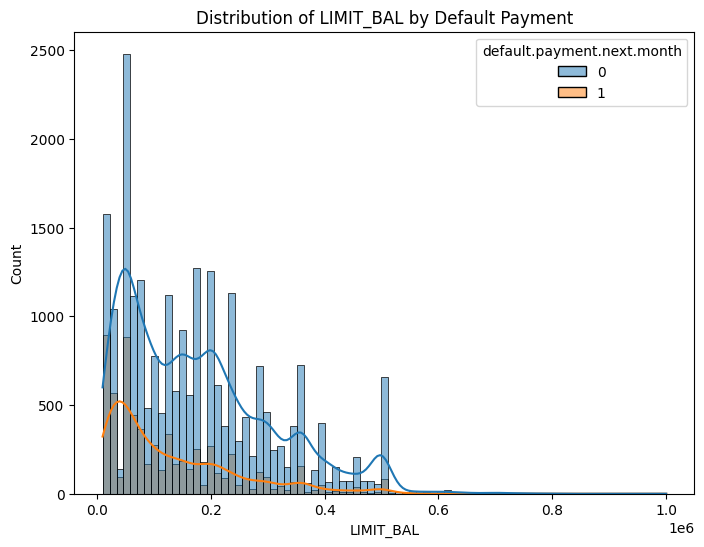

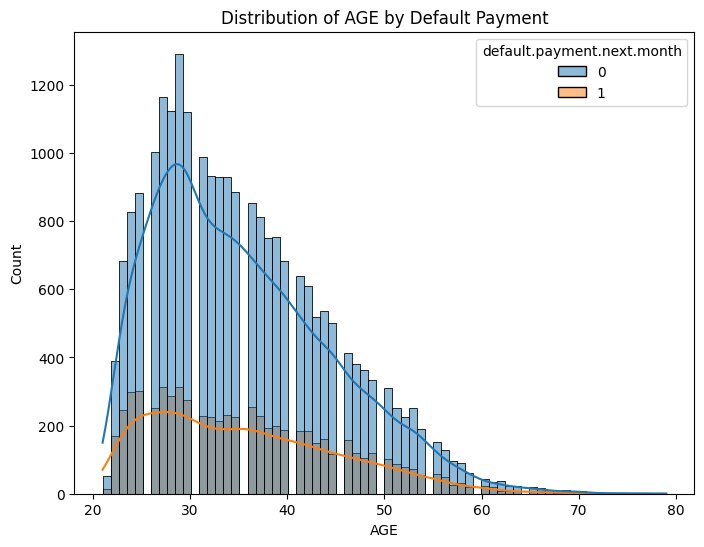

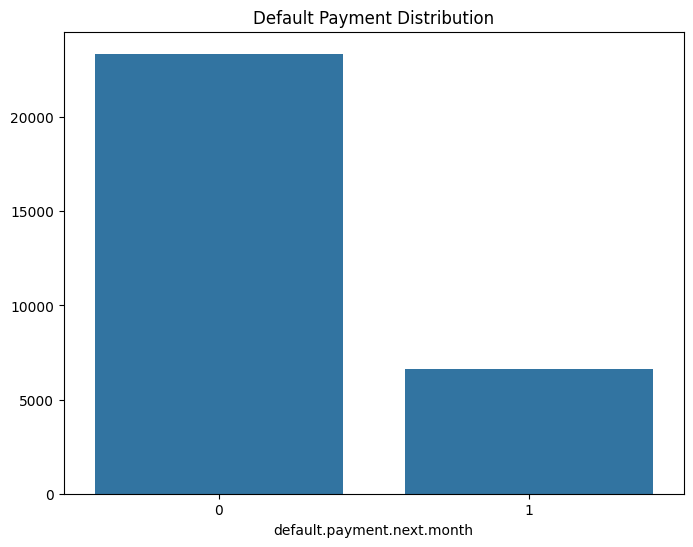

In [190]:
df_to_hist = credit_risk[['LIMIT_BAL', 'AGE','default.payment.next.month']]
numerical_features = df_to_hist.select_dtypes(include=['number']).columns.drop('default.payment.next.month')

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_to_hist, x=feature, hue='default.payment.next.month', kde=True)
    plt.title(f'Distribution of {feature} by Default Payment')
    plt.show()

default_payment = credit_risk['default.payment.next.month'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=default_payment.index, y=default_payment.values)
plt.title('Default Payment Distribution')
plt.show()

####  Box Plots (แผนภาพกล่อง)

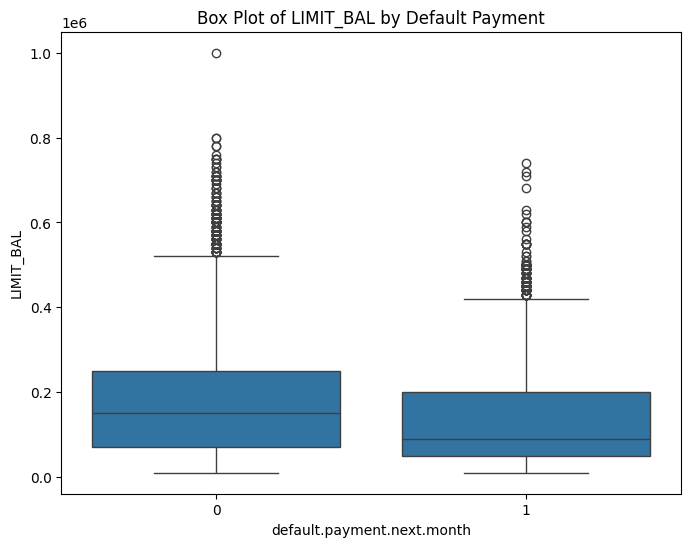

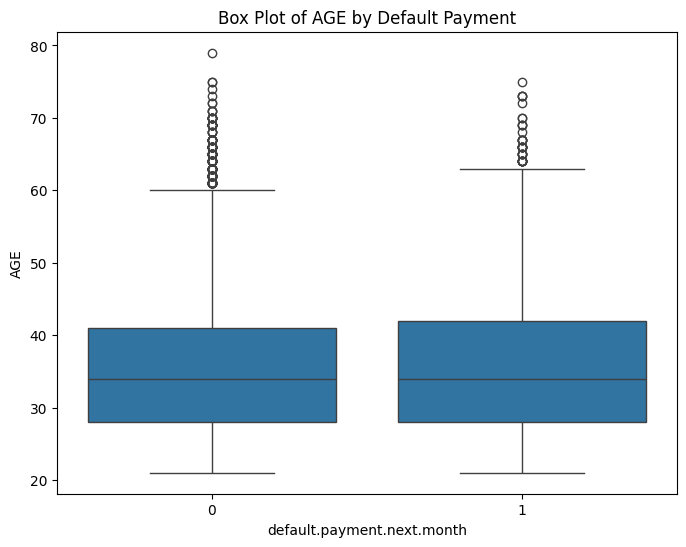

In [191]:

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=credit_risk, x='default.payment.next.month', y=feature)
    plt.title(f'Box Plot of {feature} by Default Payment')
    plt.show()

#### Scatter Plots (แผนภาพกระจาย)

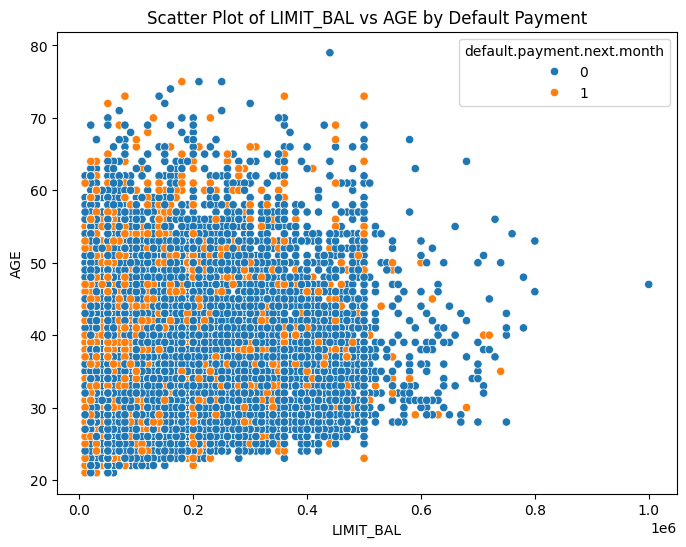

In [192]:
#เลือกตัวแปรมาสองตัวอย่างเช่น LIMIT_BAL และ AGE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=credit_risk, x='LIMIT_BAL', y='AGE', hue='default.payment.next.month')
plt.title('Scatter Plot of LIMIT_BAL vs AGE by Default Payment')
plt.show()

#### Correlation Matrix (เมทริกซ์สหสัมพันธ์):

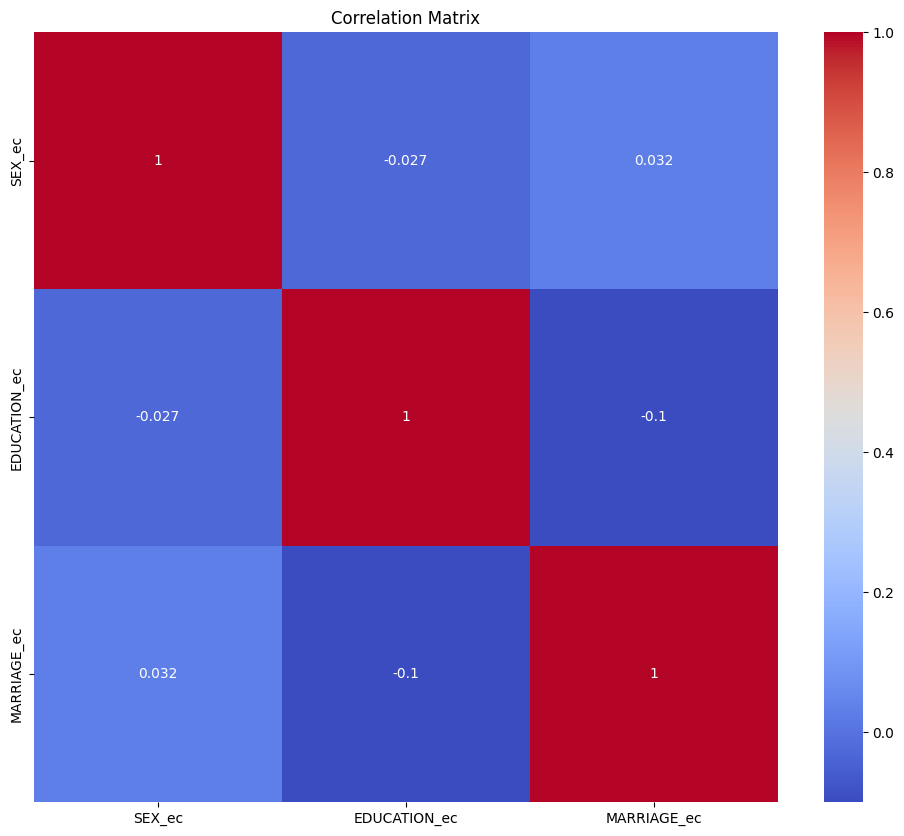

In [193]:
correlation_matrix = credit_risk[['SEX_ec','EDUCATION_ec','MARRIAGE_ec']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

####  Bar Plots (แผนภาพแท่ง)

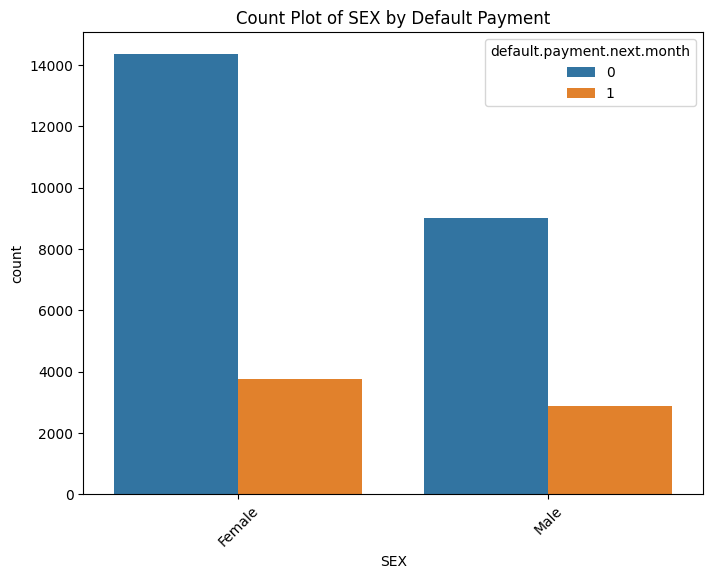

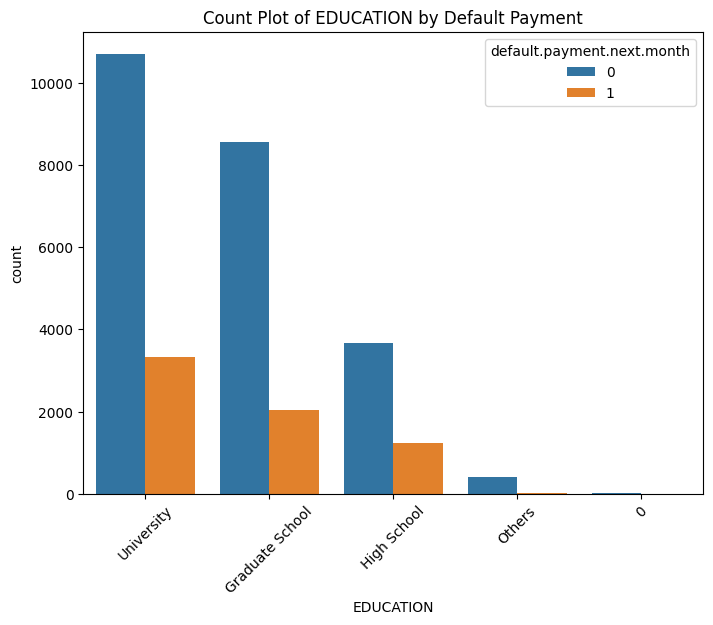

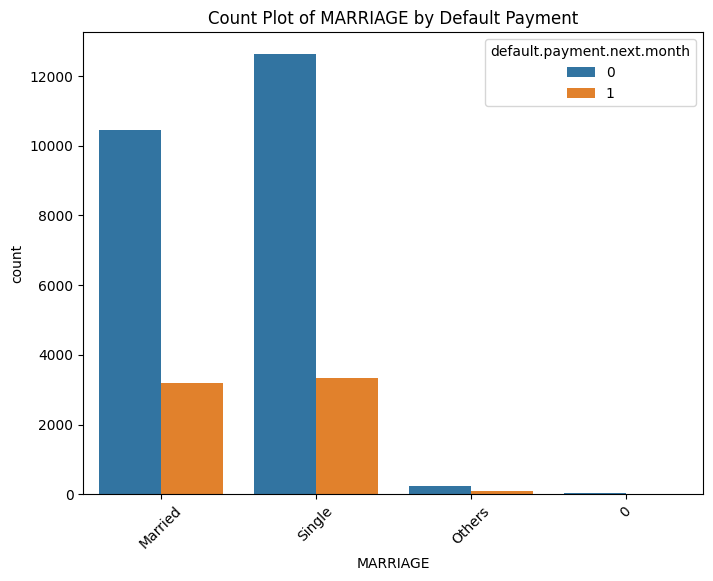

In [194]:
credit_risk1 = pd.read_csv("UCI_credit_card.csv")
credit_risk1 = credit_risk1.drop(columns=['ID'])

credit_risk1['SEX'] = credit_risk1['SEX'].replace({1: 'Male', 2: 'Female'})
credit_risk1['EDUCATION'] = credit_risk1['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others',5:'Others',6:'Others'})
credit_risk1['MARRIAGE'] = credit_risk1['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'})
categorical_features = credit_risk1.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=credit_risk1, x=feature, hue='default.payment.next.month')
    plt.title(f'Count Plot of {feature} by Default Payment')
    plt.xticks(rotation=45)
    plt.show()


# **สร้างโมเดลประเมิน PD (Probability of Default)**

### __โมเดลที่ใช้บ่อย ได้แก่__
### - Logistic Regression (เหมาะกับ PD เพราะให้ค่าความน่าจะเป็น)
### - Random Forest, XGBoost (ช่วยจับความสัมพันธ์ที่ซับซ้อนขึ้น)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Logistic Regression
model_pd = LogisticRegression()
model_pd.fit(X_train,y_train)
y_pred = model_pd.predict(X_test)
y_pred_proba = model_pd.predict_proba(X_test)[:,1] # เลือกเฉพาะคอลัมน์ที่ 2 (index=1) ที่แสดงถึงความน่าจะเป็นที่ลูกค้าจะไม่ชำระหนี้
y_pred_proba

# ROC AUC Score (Receiver Operating Characteristic - Area Under Curve)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc:.2f}')

AUC Score: 0.66


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
